In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
def mean_adjusted_power_error(y_true, y_pred, center=125, critical_range=55, slope=100, verbose=False):
    def exponent(y_hat: float, y_i: float, a=center, b=critical_range, c=slope) -> float:
        return 2-np.tanh(((y_i-a)/b))*((y_hat-y_i)/c)
    sum_=0
    for i in range(len(y_true)):
        exp = exponent(y_pred[i], y_true[i])
        if verbose:
            print(exp)
        sum_ += abs((y_pred[i]-y_true[i]))**exp
    return sum_/len(y_true)


In [ ]:
def calculate(rules, input_dict, output_var):
    controller = ctrl.ControlSystem(rules)
    simulation = ctrl.ControlSystemSimulation(controller)
    for key,value in input_dict.items():
        simulation.input[key] = value
    simulation.compute()
    # output_var.view(sim=simulation)
    return simulation.output['predicted glucose concentration']





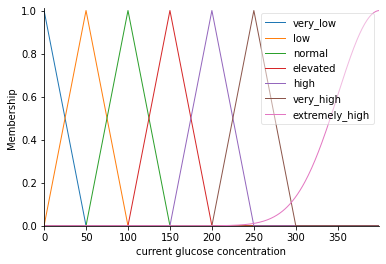

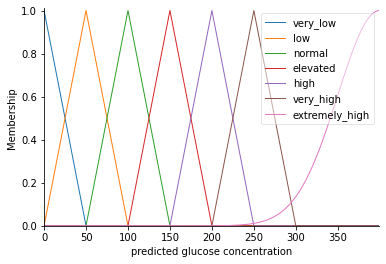

In [ ]:
# experiment 1 (benchmark/mirroring)

# antecendents
ac_curr_gl = ctrl.Antecedent(np.arange(0,400,1), 'current glucose concentration')
ac_time_of_day = ctrl.Antecedent(np.arange(0, 25, 1), 'time of day')


ac_curr_gl['very_low'] = fuzz.trimf(ac_curr_gl.universe, [0,0,50])
ac_curr_gl['low'] = fuzz.trimf(ac_curr_gl.universe, [0,50,100])
ac_curr_gl['normal'] = fuzz.trimf(ac_curr_gl.universe, [50,100,150])
ac_curr_gl['elevated'] = fuzz.trimf(ac_curr_gl.universe, [100,150,200])
# ac_curr_gl['high'] = fuzz.trapmf(ac_curr_gl.universe, [150,200,400,400])
# ac_curr_gl['high'] = fuzz.trimf(ac_curr_gl.universe, [150,400,400])
ac_curr_gl['high'] = fuzz.trimf(ac_curr_gl.universe, [150,200,250])
ac_curr_gl['very_high'] = fuzz.trimf(ac_curr_gl.universe, [200,250,300])
# ac_curr_gl['extremely_high'] = fuzz.trimf(ac_curr_gl.universe, [250,400,400])
ac_curr_gl['extremely_high'] = fuzz.gaussmf(ac_curr_gl.universe, 400, 50)

ac_curr_gl.view()

# consequents
cq_pred_gl = ctrl.Consequent(np.arange(0,400,1), 'predicted glucose concentration')

cq_pred_gl['very_low'] = fuzz.trimf(cq_pred_gl.universe, [0,0,50])
cq_pred_gl['low'] = fuzz.trimf(cq_pred_gl.universe, [0,50,100])
cq_pred_gl['normal'] = fuzz.trimf(cq_pred_gl.universe, [50,100,150])
# cq_pred_gl['high'] = fuzz.trapmf(cq_pred_gl.universe, [150,200,400,400])
cq_pred_gl['elevated'] = fuzz.trimf(cq_pred_gl.universe, [100,150,200])
# cq_pred_gl['high'] = fuzz.trimf(cq_pred_gl.universe, [150,400,400])
cq_pred_gl['high'] = fuzz.trimf(cq_pred_gl.universe, [150,200,250])
cq_pred_gl['very_high'] = fuzz.trimf(cq_pred_gl.universe, [200,250,300])
# cq_pred_gl['extremely_high'] = fuzz.trimf(cq_pred_gl.universe, [250,400,400])
cq_pred_gl['extremely_high'] = fuzz.gaussmf(cq_pred_gl.universe, 400, 50)

cq_pred_gl.view()

#rules

rules = []
rules.append(ctrl.Rule(ac_curr_gl['very_low'] , cq_pred_gl['very_low']))
rules.append(ctrl.Rule(ac_curr_gl['low'] , cq_pred_gl['low']))
rules.append(ctrl.Rule(ac_curr_gl['normal'] , cq_pred_gl['normal']))
rules.append(ctrl.Rule(ac_curr_gl['elevated'] , cq_pred_gl['elevated']))
rules.append(ctrl.Rule(ac_curr_gl['high'] , cq_pred_gl['high']))
rules.append(ctrl.Rule(ac_curr_gl['very_high'] , cq_pred_gl['very_high']))
rules.append(ctrl.Rule(ac_curr_gl['extremely_high'] , cq_pred_gl['extremely_high']))

# calculate(rules, {'current glucose concentration': 100}, cq_pred_gl)
# calculate(rules, {'current glucose concentration': 150}, cq_pred_gl)
# calculate(rules, {'current glucose concentration': 160}, cq_pred_gl)
# calculate(rules, {'current glucose concentration': 50}, cq_pred_gl)
# calculate(rules, {'current glucose concentration': 110}, cq_pred_gl)
# calculate(rules, {'current glucose concentration': 250}, cq_pred_gl)
# calculate(rules, {'current glucose concentration': 240}, cq_pred_gl)

reference = np.arange(0,400,10)
# print(reference)
predictions = []
for value in reference:
    result = calculate(rules, {'current glucose concentration': value}, cq_pred_gl)
    predictions.append(result)

# print(predictions)




[40, 0, 0, 0, 0]


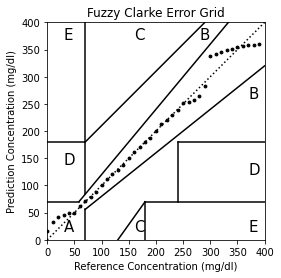

In [ ]:
from cega import clarke_error_grid
results = {}
results['Scenario 1'] = {}
zones = clarke_error_grid(reference,predictions, "Fuzzy")[1]
print(zones)
results['Scenario 1']['A'] = zones[0]
results['Scenario 1']['B'] = zones[1]
results['Scenario 1']['C'] = zones[2]
results['Scenario 1']['D'] = zones[3]
results['Scenario 1']['E'] = zones[4]
mse = mean_squared_error(reference, predictions)
results['Scenario 1']['MSE'] = round(mse, 2)
results['Scenario 1']['RMSE'] = round(np.sqrt(mse), 2)
mape = mean_adjusted_power_error(reference, predictions)
results['Scenario 1']['MAPE'] = round(mape, 2)
results['Scenario 1']['RMAPE'] = round(np.sqrt(mape), 2)
plt.show();


In [ ]:
print(results)

{'Scenario 1': {'A': 40, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'MSE': 179.02, 'RMSE': 13.38, 'MAPE': 213.22, 'RMAPE': 14.6}}
